In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
# Manage paths
%run setup_notebooks.py

In [4]:
from toolbox import wandb_export
from src import setup

In [5]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [6]:
import wandb

api = wandb.Api()

# Coarse sweep analysis

Was done without KfoldCV, only a 75/25 train-val ratio.

In [7]:
sweep_id = 'tyyokssq'

In [9]:
runs = api.runs('mazeller/GNN-MI-config', filters={'sweep': sweep_id})
len(runs)

52

In [51]:
df_summary, df_config = wandb_export.process_runs(runs)

2022-03-19 21:32:39,294 [wandb_export] [INFO] extracting runs metadata
2022-03-19 21:32:39,299 [wandb_export] [INFO] extracting runs summary and config
2022-03-19 21:32:39,438 [wandb_export] [INFO] expanding column val
2022-03-19 21:32:39,440 [wandb_export] [INFO] expanding column train


<AxesSubplot:xlabel='id'>

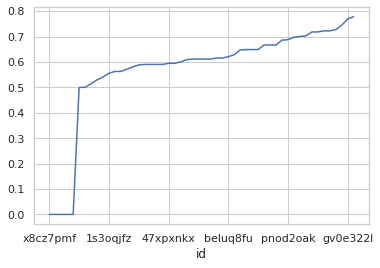

In [52]:
df_summary['val.f1-score'].sort_values().plot()

In [53]:
df_earlystop = df_config[['epochs', 'optimizer.lr']].join(df_summary[['train.epoch', 'val.f1-score']])
df_earlystop['delta'] = df_earlystop['epochs'] - df_earlystop['train.epoch']
df_earlystop.sort_values('val.f1-score', ascending=False).head(15)

,epochs,optimizer.lr,train.epoch,val.f1-score,delta
id,,,,,
ijre84ao,56,0.000655,56.0,0.777778,0.0
gv0e322l,182,0.000543,182.0,0.769231,0.0
q0z4x1wp,67,0.000925,67.0,0.744186,0.0
2bqaq9j4,69,0.001324,69.0,0.727273,0.0
e67c4flf,372,0.001338,160.0,0.722222,212.0
sgbbndt6,183,0.000058,183.0,0.722222,0.0
we9oczpr,324,0.000052,266.0,0.717949,58.0
g2n7jgpe,285,0.000354,285.0,0.717949,0.0
8vlj7b55,389,0.000865,196.0,0.702703,193.0


## Join

In [60]:
mask = df_config.nunique() > 1
df = df_summary[['val_loss', 'train.loss', 'val.f1-score', 'train.epoch']].join(df_config[mask[mask].index])
df

,val_loss,train.loss,val.f1-score,train.epoch,epochs,num_equiv,optimizer.lr,num_hidden_dim
id,,,,,,,,
x8cz7pmf,0.851712,0.837034,0.000000,129.0,378,5,0.001758,16
9j42ihq4,0.658603,0.565037,0.600000,208.0,324,5,0.000009,16
3rfwgjee,0.668987,0.433936,0.615385,206.0,211,5,0.000335,8
dn327sr5,0.652416,0.605649,0.529412,236.0,278,3,0.000008,16
mn67mzlj,0.774807,0.80043,0.590164,140.0,283,3,0.004541,16
oie4i7eg,0.682457,0.695776,0.590164,175.0,263,3,0.001101,8
g2n7jgpe,0.553847,0.413448,0.717949,285.0,285,3,0.000354,16
e67c4flf,0.558488,0.520057,0.722222,160.0,372,3,0.001338,8
jrmzyr6y,0.679758,0.425881,0.594595,240.0,271,3,0.000086,16


In [65]:
df.pivot_table('val.f1-score', 'num_equiv', 'num_hidden_dim', aggfunc='max')

num_hidden_dim,8,16
num_equiv,,
3,0.777778,0.769231
5,0.744186,0.717949


In [66]:
df.pivot_table('val.f1-score', 'num_equiv', 'num_hidden_dim', aggfunc='min')

num_hidden_dim,8,16
num_equiv,,
3,0.540541,0.0
5,0.000000,0.0


In [68]:
df.nlargest(20, 'val.f1-score')

,val_loss,train.loss,val.f1-score,train.epoch,epochs,num_equiv,optimizer.lr,num_hidden_dim
id,,,,,,,,
ijre84ao,0.550926,0.529324,0.777778,56.0,56,3,0.000655,8
gv0e322l,0.514274,0.467314,0.769231,182.0,182,3,0.000543,16
q0z4x1wp,0.543394,0.534375,0.744186,67.0,67,5,0.000925,8
2bqaq9j4,0.568512,0.564196,0.727273,69.0,69,3,0.001324,8
e67c4flf,0.558488,0.520057,0.722222,160.0,372,3,0.001338,8
sgbbndt6,0.585121,0.546378,0.722222,183.0,183,5,0.000058,8
g2n7jgpe,0.553847,0.413448,0.717949,285.0,285,3,0.000354,16
we9oczpr,0.570306,0.430282,0.717949,266.0,324,5,0.000052,16
8vlj7b55,0.551948,0.512705,0.702703,196.0,389,3,0.000865,16


# Hyperparam with KFoldCV

In [71]:
sweep_id = '7no66m9r'

In [72]:
runs = api.runs('mazeller/egnn-mi', filters={'sweep': sweep_id})
len(runs)

120

In [73]:
df_summary, df_config = wandb_export.process_runs(runs)

2022-03-20 10:40:38,816 [wandb_export] [INFO] extracting runs metadata
2022-03-20 10:40:39,606 [wandb_export] [INFO] extracting runs summary and config
2022-03-20 10:40:40,002 [wandb_export] [INFO] expanding column train
2022-03-20 10:40:40,005 [wandb_export] [INFO] expanding column val


In [93]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'num_equiv', 'optimizer.lr', 'num_hidden_dim']

In [101]:
df = df_summary[['val_loss', 'train.loss', 'val.f1-score', 'train.f1-score', 'train.epoch']]
df = df.join(df_config[hyperparams])
df = df.join(df_config['cv.fold_id'])
df = df.groupby(hyperparams).agg(['mean', 'std', 'min']).sort_values(('val.f1-score', 'mean'), ascending=False)
df

val.f1-score                      \
                                                     mean       std       min   
epochs num_equiv optimizer.lr num_hidden_dim                                    
60     3         0.00050      16                 0.692565  0.075063  0.611111   
                              8                  0.660110  0.032837  0.631579   
180    3         0.00050      8                  0.650502  0.108185  0.480000   
60     5         0.00100      8                  0.638604  0.095191  0.480000   
                 0.00050      8                  0.622813  0.061541  0.562500   
180    5         0.00050      8                  0.601292  0.119741  0.400000   
60     3         0.00100      8                  0.595067  0.091619  0.434783   
180    3         0.00003      16                 0.582800  0.079631  0.444444   
       5         0.00003      8                  0.558919  0.125549  0.357143   
60     3         0.00003      16                 0.554630  0.156602  0.296296   
       5         0.00003      16                 0.550053  0.078689  0.444444   
                              8                  0.546641  0.065488  0.461538   
       3         0.00100      16                 0.544630  0.310410  0.000000   
                 0.00003      8                  0.535178  0.117010  0.344828   
180    5         0.00003      16                 0.502424  0.118502  0.320000   
                 0.00050      16                 0.484731  0.297139  0.000000   
60     5         0.00100      16                 0.478254  0.275685  0.000000   
180    3         0.00100      8                  0.463463  0.262549  0.000000   
                 0.00003      8                  0.450131  0.263782  0.000000   
60     5         0.00050      16                 0.416176  0.382551  0.000000   
180    5         0.00100      8                  0.410955  0.376419  0.000000   
       3         0.00100      16                 0.410159  0.381153  0.000000   
                 0.00050      16                 0.361138  0.330673  0.000000   
       5         0.00100      16                 0.096000  0.214663  0.000000   

                                             train.f1-score            \
                                                       mean       std   
epochs num_equiv optimizer.lr num_hidden_dim                            
60     3         0.00050      16                   0.733846  0.010160   
                              8                    0.731367  0.032017   
180    3         0.00050      8                    0.788946  0.023399   
60     5         0.00100      8                    0.695374  0.041676   
                 0.00050      8                    0.714249  0.011692   
180    5         0.00050      8                    0.736928  0.040992   
60     3         0.00100      8                    0.716819  0.029654   
180    3         0.00003      16                   0.707124  0.042072   
       5         0.00003      8                    0.653034  0.034121   
60     3         0.00003      16                   0.623280  0.016963   
       5         0.00003      16                   0.651576  0.025258   
                              8                    0.625746  0.030046   
       3         0.00100      16                   0.544055  0.298777   
                 0.00003      8                    0.626782  0.022617   
180    5         0.00003      16                   0.732221  0.069335   
                 0.00050      16                   0.596794  0.315729   
60     5         0.00100      16                   0.530939  0.302211   
180    3         0.00100      8                    0.593983  0.333482   
                 0.00003      8                    0.540731  0.303718   
60     5         0.00050      16                   0.464027  0.360466   
180    5         0.00100      8                    0.464841  0.424776   
       3         0.00100      16                   0.453279  0.347710   
                 0.00050      16

In [127]:
df_latex = df.head(5).drop(columns='cv.fold_id')
print(df_latex.to_latex(float_format='%.3f'))

\begin{tabular}{llllrrrrrrrrr}
\toprule
    &   &        &    & \multicolumn{3}{l}{val.f1-score} & \multicolumn{3}{l}{train.f1-score} & \multicolumn{3}{l}{train.epoch} \\
    &   &        &    &         mean &   std &   min &           mean &   std &   min &        mean &    std &     min \\
epochs & num\_equiv & optimizer.lr & num\_hidden\_dim &              &       &       &                &       &       &             &        &         \\
\midrule
60  & 3 & 0.0005 & 16 &        0.693 & 0.075 & 0.611 &          0.734 & 0.010 & 0.721 &      60.000 &  0.000 &  60.000 \\
    &   &        & 8  &        0.660 & 0.033 & 0.632 &          0.731 & 0.032 & 0.686 &      60.000 &  0.000 &  60.000 \\
180 & 3 & 0.0005 & 8  &        0.651 & 0.108 & 0.480 &          0.789 & 0.023 & 0.763 &     173.000 & 15.652 & 145.000 \\
60  & 5 & 0.0010 & 8  &        0.639 & 0.095 & 0.480 &          0.695 & 0.042 & 0.643 &      60.000 &  0.000 &  60.000 \\
    &   & 0.0005 & 8  &        0.623 & 0.062 & 0.563 &  